In [2]:
#import libraries for data manipulation
import numpy as np
import pandas as pd

#import libraries for data vidualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('food_order.csv')

display(df.head())

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
#print the dataframe shape
display(df.shape)

(1898, 9)

In [5]:
#Summarize the dataframe object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [6]:
#count data types
display(df.dtypes.value_counts())

int64      4
object     4
float64    1
dtype: int64

In [7]:
#sum of null values per column
display(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [8]:
#Statistical summary of data
display(df.describe())

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [9]:
#checking how many orders are not rated
#Insert additional column with a numeric representation of the rating

df['numeric_rating'] = df['rating'].map(lambda x: 0 if not x.isnumeric() else int(x))

#count orders with a rating value of 0== not given
print(len(df[df['numeric_rating'] == 0]))

736


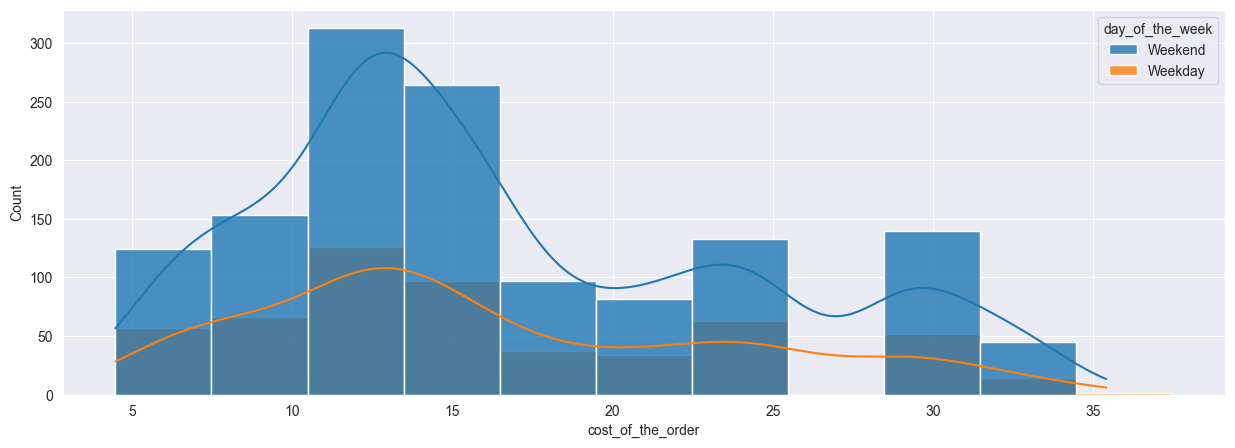

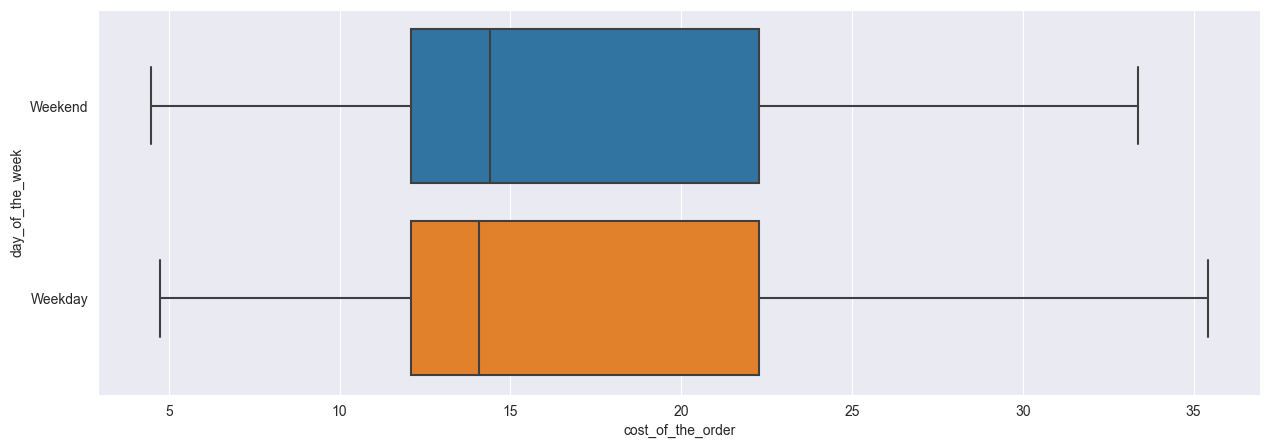

Median: 14.14


In [10]:
#Render Histogram
plt.figure(figsize=(15,5))
ax = sns.histplot(data=df, x='cost_of_the_order', hue='day_of_the_week', binwidth=3, kde=True, alpha=0.8)
plt.show()

#Render box plot
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='cost_of_the_order', y='day_of_the_week')
plt.show()

#print Median
print('Median:', df['cost_of_the_order'].median())

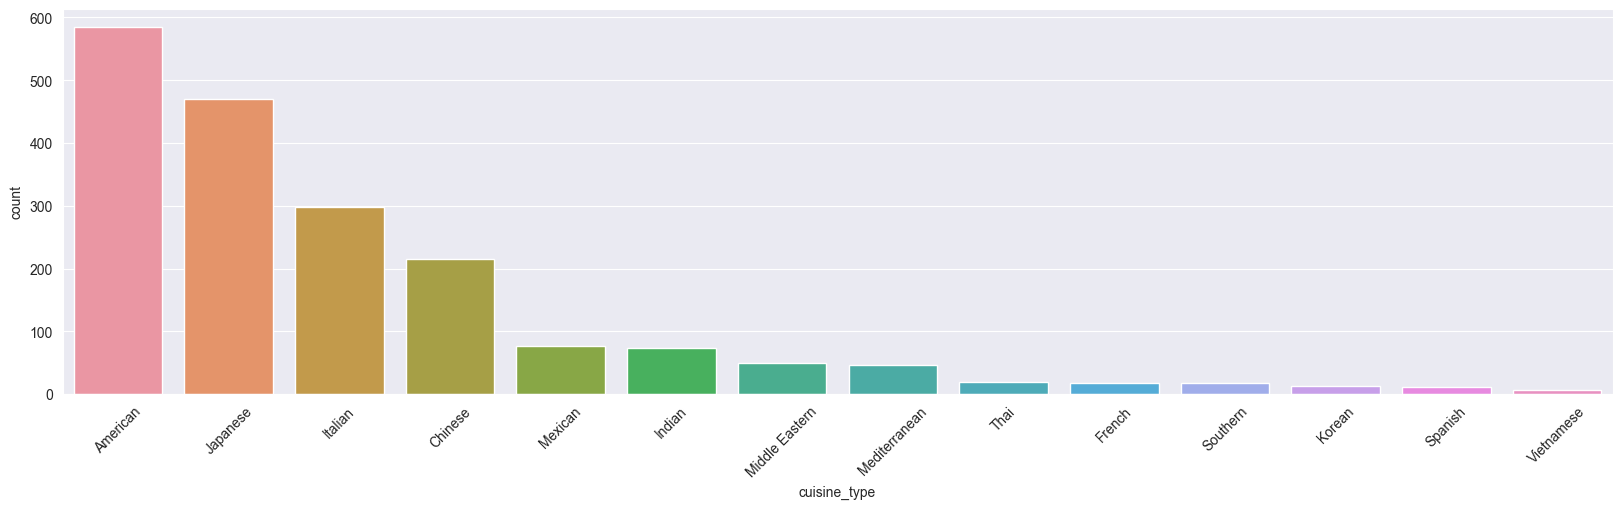

In [11]:
#Observation on cuisine types
plt.figure(figsize=(20,5))
ax = sns.countplot(data=df, x='cuisine_type', order= df['cuisine_type'].value_counts().index )

#Rotate x_axis ticks
ax.tick_params(axis= 'x', rotation=45)

plt.show()

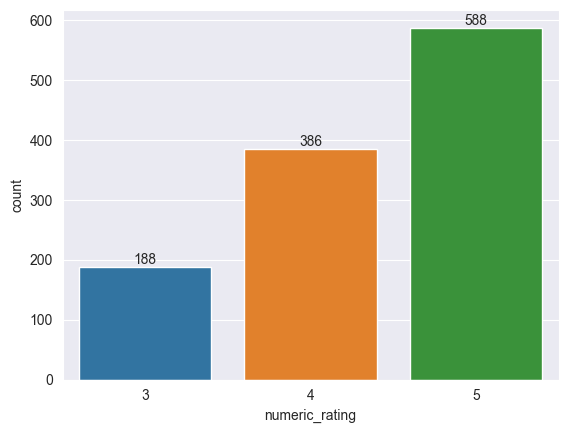

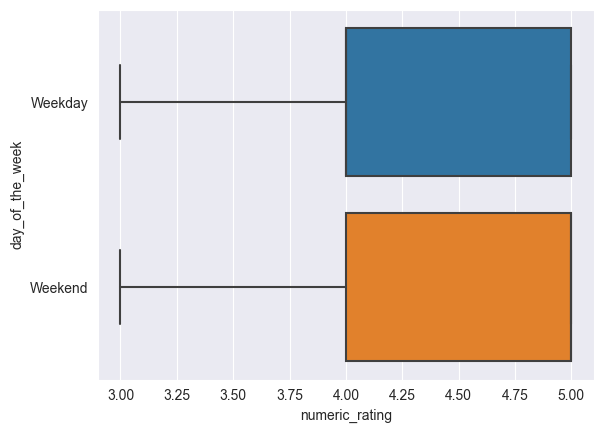

In [12]:
q6_3_df = df[df['numeric_rating']!=0]

#CountPlot
ax= sns.countplot(data=q6_3_df, x='numeric_rating')
#Display respective counts as bar labels
ax.bar_label(ax.containers[0])
plt.show()


#Box plot
sns.boxplot(data=q6_3_df, x='numeric_rating', y='day_of_the_week')
plt.show()



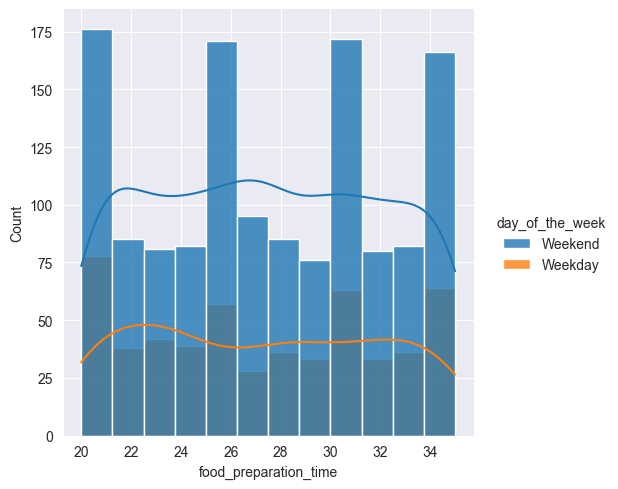

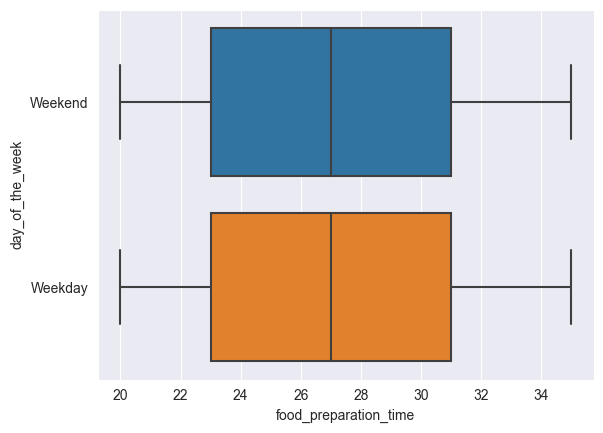

Median 27.0
Max Values 35
Standard deviation: 4.63


In [13]:
#Distplot overlay(by day of the week/hue)
dist1 = sns.displot(data=df, x='food_preparation_time', hue= 'day_of_the_week', kde=True, alpha=0.8)
plt.show()

#Box plot
sns.boxplot(data=df, x= 'food_preparation_time', y= 'day_of_the_week')
plt.show()

#Print Median & standard deviation
print('Median', round(df['food_preparation_time'].median(), 2))
print('Max Values', round(df['food_preparation_time'].max(), 2))
print('Standard deviation:', round(df['food_preparation_time'].std(), 2))

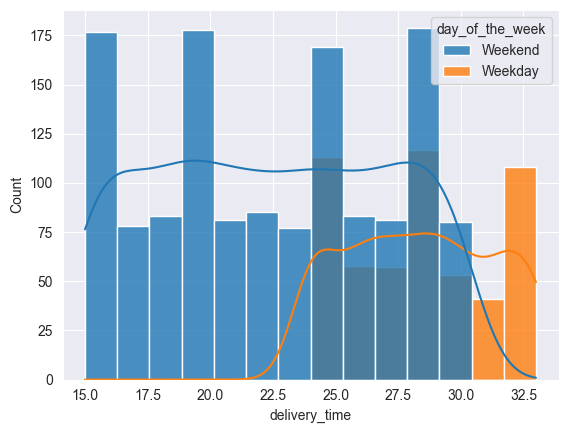

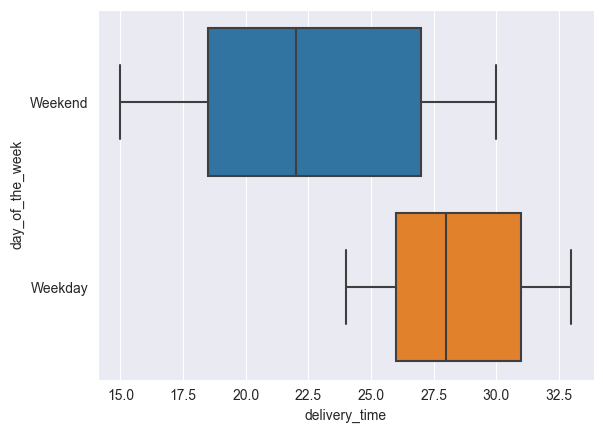

Median_Values 25.0
Max-Value 33
Std_Deviation 4.97


In [14]:
#Observation of delivery time
#Histogram overlay (by day of the week/hue)
dis2 = sns.histplot(x='delivery_time', data= df, hue= 'day_of_the_week', kde=True, alpha=0.8)
plt.show()

#Box Plot
sns.boxplot(data= df, x='delivery_time', y= 'day_of_the_week')
plt.show()

#print Median, max and std deviation values
print('Median_Values', round(df['delivery_time'].median(), 2))
print('Max-Value', round(df['delivery_time'].max(), 2))
print('Std_Deviation', round(df['delivery_time'].std(), 2))

In [15]:
#Top 5 restaurants in terms of the number of orders received
order_counts = df.groupby(['restaurant_name'], as_index=False)['order_id'].count().sort_values(by=['order_id'], ascending= False).rename(columns= {'order_id': 'order_count'}).reset_index()
display(order_counts)

,index,restaurant_name,order_count
0,136,Shake Shack,219
1,153,The Meatball Shop,132
2,21,Blue Ribbon Sushi,119
3,20,Blue Ribbon Fried Chicken,96
4,109,Parm,68
...,...,...,...
173,85,Klong,1
174,83,Kambi Ramen House,1
175,77,Il Bambino,1
176,76,Hunan Manor,1


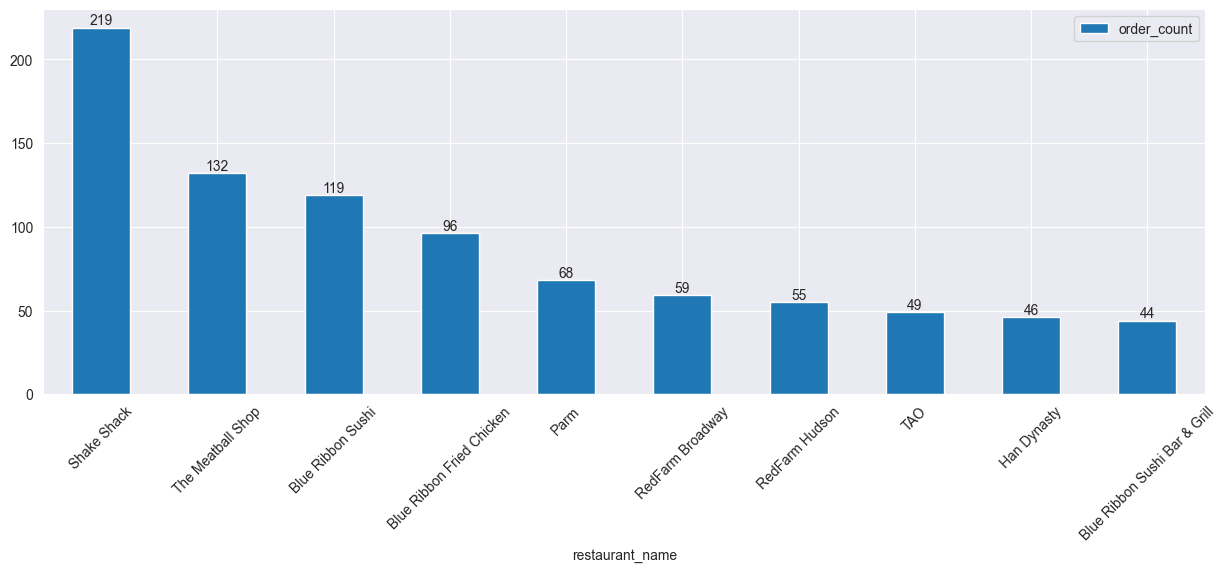

In [16]:
#Plot top ten entries for additional visibility
ax = order_counts.head(10).plot(x='restaurant_name', y='order_count', kind = 'bar', figsize=(15,5))
ax.tick_params(axis='x', rotation=45)

#Display respective counts as bar Labels
ax.bar_label(ax.containers[0])
plt.show()

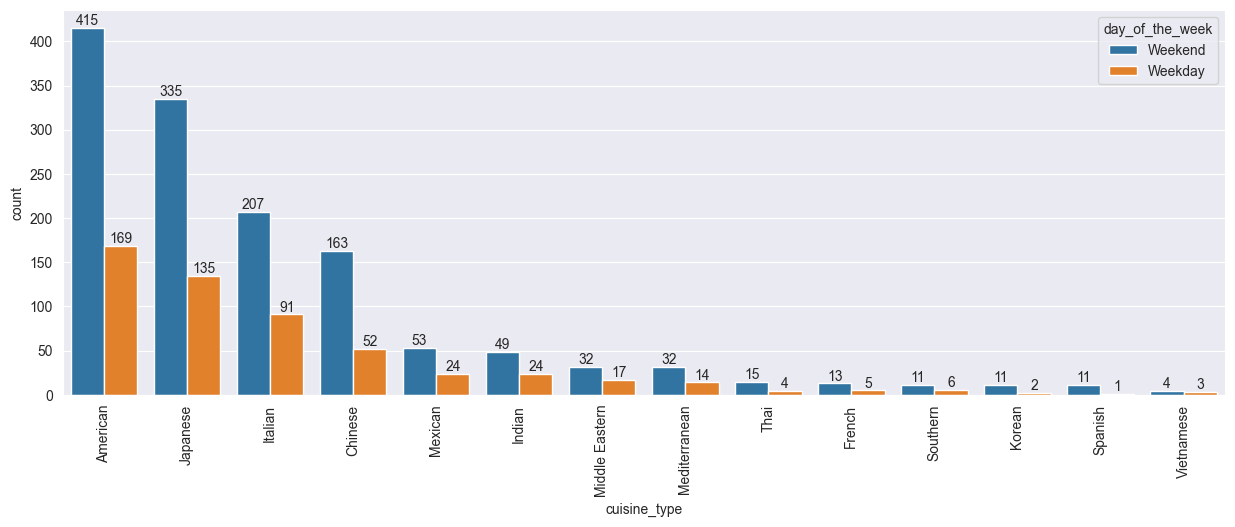

In [17]:
#Finding most popular cuisine on the weekedends
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, hue= 'day_of_the_week')
ax.tick_params(axis='x', rotation= 90)

#Display respective counts as bar labels for both hues
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [18]:
#Checking percentage of orders that cost more than 20$
percent_orders_over_20 = len(df[df['cost_of_the_order'] >20])/len(df)

#Conversion from .2f representation
print("%2.2f%% of all orders cost more than 20 dollars." % (percent_orders_over_20 * 100))

29.24% of all orders cost more than 20 dollars.


In [19]:
#Checking the mean order delivery time
order_delivery_mean = round(df['delivery_time'].mean(), 2)
order_delivery_std = round(df['delivery_time'].std(), 2)

order_delivery_ratio= order_delivery_std/ order_delivery_mean

print('Order delivery mean time:', order_delivery_mean)
print('Standard deviation:', order_delivery_std)
print('Coefficient of variation (CV)', "%2.2f%%" %(order_delivery_ratio*100))

Order delivery mean time: 24.16
Standard deviation: 4.97
Coefficient of variation (CV) 20.57%


In [20]:
q11_result = df[['order_id', 'customer_id']].groupby(['customer_id'], as_index=False).count().sort_values(by='order_id', ascending= False).rename(columns={'order_id': 'order_count'}).reset_index().head(3)

display(q11_result)

,index,customer_id,order_count
0,116,52832,13
1,84,47440,10
2,333,83287,9


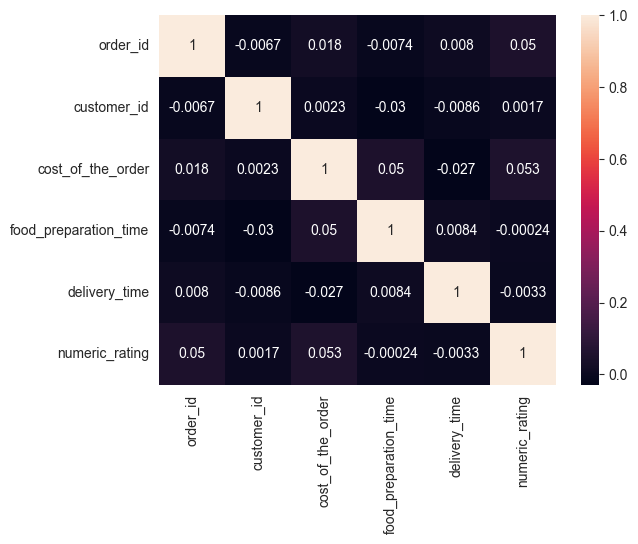

In [21]:
#Checkig for correlation in the data
#use Spearmans rank
#The closer to 1 the value is the more correlated it is

sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

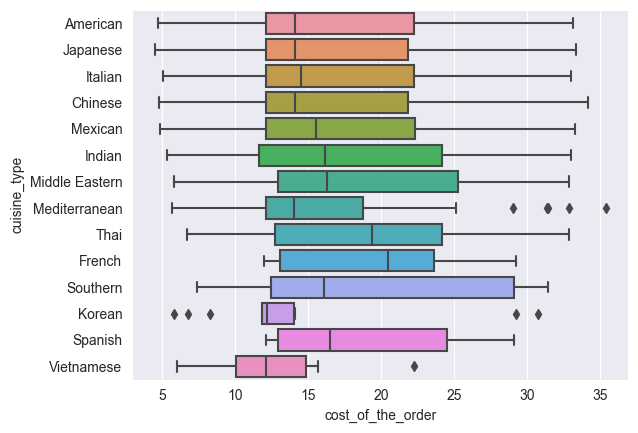

In [22]:
sns.boxplot(data=df, x='cost_of_the_order', y='cuisine_type', order=df['cuisine_type'].value_counts().index)

plt.show()

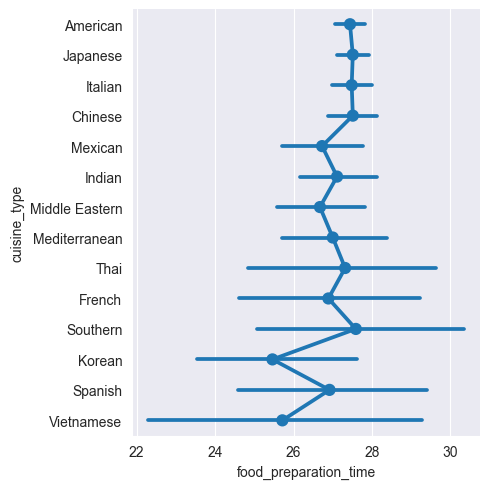

In [23]:
#Preparation time according to cuisine type
sns.catplot(data=df, x='food_preparation_time', y='cuisine_type', kind='point', order=df['cuisine_type'].value_counts().index)
plt.show()

The top cuisines have a consistent food preparation time, that might be an indication to their overall success as there is less variability in the time take to prepare meals overall..They are generally more consistent that other cuisines

In [24]:
#Excude entries with no ratind from both frames
with_ratings = df[df['numeric_rating']!=0]

#Create a dataframe matching condition one
ratingGreater50 = with_ratings[['restaurant_name', 'numeric_rating']].groupby('restaurant_name').count()>50

ratingGreater50['count'] = with_ratings.groupby('restaurant_name')['numeric_rating'].count()

#Create a dataframe matching condition two
with_cond_2 = with_ratings[['restaurant_name', 'numeric_rating']].groupby('restaurant_name').mean()>4

with_cond_2['mean']= with_ratings.groupby('restaurant_name')['numeric_rating'].mean()

#Intersect(merge) the resulting data frames on the restuarant name
q13_result = pd.merge(ratingGreater50[ratingGreater50['numeric_rating']], with_cond_2[with_cond_2['numeric_rating']], on='restaurant_name').rename(columns={'numeric_rating_x':'more_than_50_rating', 'numeric_rating_y': 'greater_than_four_average'})

#Present
display(q13_result[['count', 'mean', 'more_than_50_rating', 'greater_than_four_average']].sort_values(by='count', ascending=False))

,count,mean,more_than_50_rating,greater_than_four_average
restaurant_name,,,,
Shake Shack,133,4.278195,True,True
The Meatball Shop,84,4.511905,True,True
Blue Ribbon Sushi,73,4.219178,True,True
Blue Ribbon Fried Chicken,64,4.328125,True,True


The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [25]:
sum_orders_over_20 = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()
sum_orders_over_5 = df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)]['cost_of_the_order'].sum()

print(sum_orders_over_20 * 0.25 +sum_orders_over_5 *0.15)

6166.303


Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]¶


In [28]:
count_deliveries_over_60_minutes = len(df[df['food_preparation_time'] + df['delivery_time']>60])
print(round(count_deliveries_over_60_minutes/len(df)*100, 2))

10.54


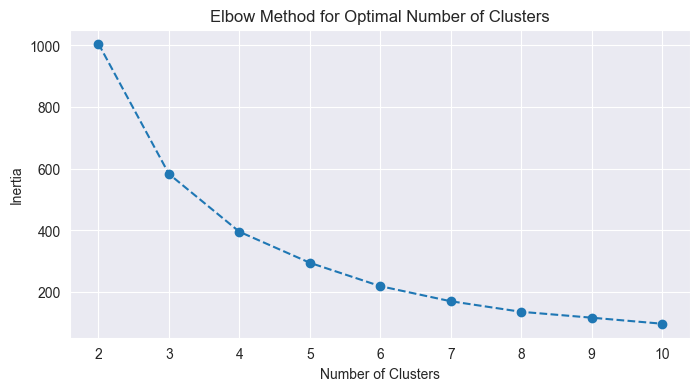

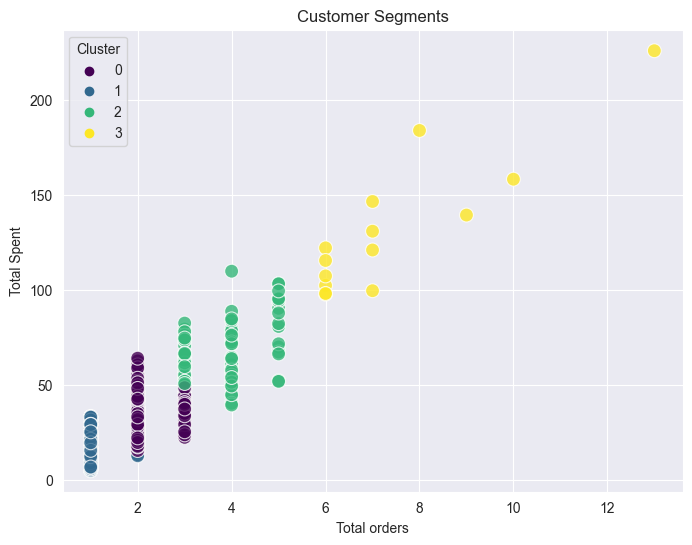

     customer_id  total_orders  total_spent  cluster
84         47440            10       158.18        3
116        52832            13       225.80        3
839       250494             8       183.83        3
Silhoutte Score for the model with 4 clusters: 0.611
   cluster  avg_orders   avg_spent  customer_count
0        0    2.126667   33.438967             300
1        1    1.006337   16.498023             789
2        2    3.731959   66.172268              97
3        3    7.428571  131.962857              14


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Aggregate the data to get customer-level information
#Calculate total numbere of orders and total expenditure by customer

customer_data= df.groupby('customer_id').agg(
                total_orders=('order_id', 'count'),
                total_spent=('cost_of_the_order', 'sum')).reset_index()

customer_data

#Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['total_orders', 'total_spent']])

#apply K-Means algorithm
#Determine the optimal number of clusters using the elbow method

inertia=[]
range_n_clusters= range(2, 11)

for n_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
#Plot the Elbow Curve
plt.figure(figsize=(8,4))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#Based on the elbow plot, select the optimal number of clusters
optimal_clusters= 4
kmeans= KMeans(n_clusters=optimal_clusters, random_state= 42)
customer_data['cluster']= kmeans.fit_predict(scaled_features)

#Analyze the clusters
#add cluster labels back to the original DataFrame
customer_data['cluster'] = kmeans.labels_

#Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_orders', y='total_spent', hue='cluster', data=customer_data, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments')
plt.xlabel('Total orders')
plt.ylabel('Total Spent')
plt.legend(title= 'Cluster')
plt.show()

print(customer_data[customer_data['total_spent']>150])

#Calculate Silhoutte Score to evaluate Clustering
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)

print(f'Silhoutte Score for the model with {optimal_clusters} clusters: {silhouette_avg:.3f}')

#Analysze each Cluster
cluster_summary = customer_data.groupby('cluster').agg(
                    avg_orders=('total_orders', 'mean'),
                    avg_spent= ('total_spent', 'mean'),
                    customer_count=('customer_id', 'count')).reset_index()

print(cluster_summary)